 Stufe 1
 Basteles Dir ein minimales Beipiel für die Anwendung des SimpleImputers. (Ähnlich wie Doku)
 Vollziehe die Aktionen mit den Beispielen nach

 Schau die die Seiten der Mathebibel an und vollziehe das Beispiel mit dem Eigenwert nach.
 https://www.mathebibel.de/eigenwerte-eigenvektoren

 Stufe 2
 Generiere Dir Daten für eine drei-dimensionale Struktur der Form a*x1+b*x2+c*x3=y.
 Falls erforderlich, zentriere die Daten
 Füge für die zweite Achse viel Rauschen hinzu und plotte.
 Transformiere die X-Daten, so dass sie durch das neue Koordinatensystem beschrieben werden.
 Ermittle die neuen Koordinatenvektoren und die erklärte Varianz  mittels PCA.
 Transformiere die X-Daten, so dass sie durch das neue Koordinatensystem beschrieben werden
 und schaue die transformierten Daten an.

 Stufe 3a
 Führe eine Lineare Regression auf den Daten vor der PCA durch,
 führe eine PCA durch und reduziere die Dimensionen und mache dann erneut eine PCA.
 Vergleiche den Plot.

 alternativ 3b :
 Beschäftige dich mit SVM von gestern.

 Stufe 4
 importiere sklearn.datasets.make_swissrole und überlege, ob man hier eine KernelPCA ansetzen könnte.


 # Imputer stuff:

In [1]:
import numpy as np
from numpy.core.defchararray import replace
from sklearn.impute import SimpleImputer

n = 9
incomplete_array = np.arange(n**2, dtype=float).reshape((n, n))
ii = np.random.choice(np.arange(n), size=n, replace=False)
jj = np.random.choice(np.arange(n), size=n, replace=False)
for i, j in zip(ii, jj):
    incomplete_array[i, j] = np.nan
print(incomplete_array)

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
print(imputer_mean.fit_transform(incomplete_array))



[[ 0.  1. nan  3.  4.  5.  6.  7.  8.]
 [ 9. 10. 11. 12. 13. 14. nan 16. 17.]
 [18. nan 20. 21. 22. 23. 24. 25. 26.]
 [27. 28. 29. 30. nan 32. 33. 34. 35.]
 [36. 37. 38. 39. 40. 41. 42. 43. nan]
 [45. 46. 47. 48. 49. nan 51. 52. 53.]
 [54. 55. 56. 57. 58. 59. 60. nan 62.]
 [nan 64. 65. 66. 67. 68. 69. 70. 71.]
 [72. 73. 74. nan 76. 77. 78. 79. 80.]]
[[ 0.     1.    42.5    3.     4.     5.     6.     7.     8.   ]
 [ 9.    10.    11.    12.    13.    14.    45.375 16.    17.   ]
 [18.    39.25  20.    21.    22.    23.    24.    25.    26.   ]
 [27.    28.    29.    30.    41.125 32.    33.    34.    35.   ]
 [36.    37.    38.    39.    40.    41.    42.    43.    44.   ]
 [45.    46.    47.    48.    49.    39.875 51.    52.    53.   ]
 [54.    55.    56.    57.    58.    59.    60.    40.75  62.   ]
 [32.625 64.    65.    66.    67.    68.    69.    70.    71.   ]
 [72.    73.    74.    34.5   76.    77.    78.    79.    80.   ]]


 # Python Data Science Handbook (VanDerPlas) PCA in Depth
 See https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


 ## Introducing Principal Component Analysis:

(-0.03102883229218132,
 1.2246406576858517,
 -0.044366233974422534,
 0.9015029291751393)

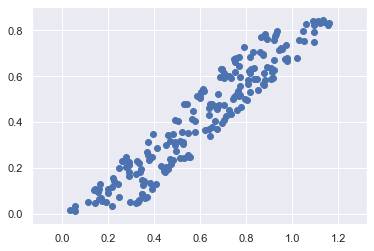

In [3]:
np.random.seed(6)
x1 = np.random.rand(2, 2)
x2 = np.random.rand(2, 200)
X = np.dot(x1, x2).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [5]:
print(pca.components_)

[[-0.75871396 -0.65142392]
 [-0.65142392  0.75871396]]


In [6]:
print(pca.explained_variance_)

[0.13023885 0.00324578]


[Text(0, 0.5, 'y'), Text(0.5, 0, 'x'), Text(0.5, 1.0, 'input')]

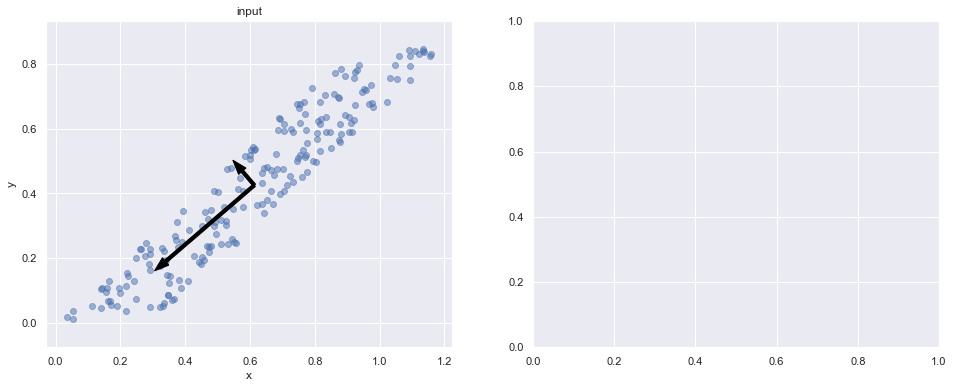

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# plot data
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    axes[0].arrow(*pca.mean_, *v, width=0.01, color='black')
axes[0].axis('equal')
axes[0].set(xlabel='x', ylabel='y', title='input')


 ## PCA as dimensionality reduction:

In [8]:
# plot principal components
X_pca = pca.transform(X)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
axes[1].arrow(*(0, 0), *(0, 0.5), width=0.01, color='black')
axes[1].arrow(*(0, 0), *(0.5, 0), width=0.01, color='black')
axes[1].axis('equal')
axes[1].set(xlabel='component 1', ylabel='component 2', title='principal components')#, xlim=(-1, 1), ylim=(-0.2, 0.2))

[Text(504.18181818181813, 0.5, 'component 2'),
 Text(0.5, 17.200000000000003, 'component 1'),
 Text(0.5, 1, 'principal components')]

In [9]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-0.03102883229218132,
 1.2246406576858517,
 -0.09273573840467494,
 0.9257227625052588)

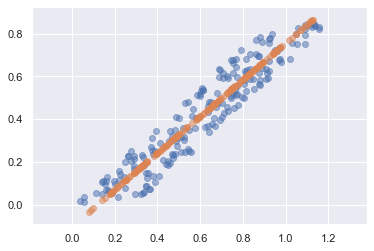

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5)
plt.axis('equal')



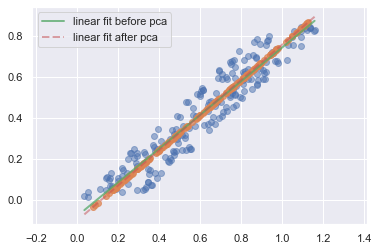

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_train, y_train = X[:, :1], X[:, 1]  # shapes: (n_samples, 1), (n_samples,)
X_train_new, y_train_new = X_new[:, :1], X_new[:, 1]  # shapes: (n_samples, 1), (n_samples,)
x_plot = np.linspace(X_train.min(), X_train.max(), 100)

model = LinearRegression().fit(X_train, y_train)
y_predict = model.predict(x_plot[:, None])

model_pca = make_pipeline(PCA(n_components=1), LinearRegression()).fit(X_train_new, y_train_new)
y_predict_pca = model_pca.predict(x_plot[:, None])

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.75)
plt.plot(x_plot, y_predict, linewidth=2, alpha=0.75, color='g', label='linear fit before pca')
plt.plot(x_plot, y_predict_pca, linewidth=2, linestyle='--', alpha=0.5, color='r', label='linear fit after pca')
plt.axis('equal')
plt.legend()
